In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv',encoding='latin-1')

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

Column Details
* rank: Position of the YouTube channel based on the number of subscribers
* Youtuber: Name of the YouTube channel
* subscribers: Number of subscribers to the channel
* video views: Total views across all videos on the channel
* category: Category or niche of the channel
* Title: Title of the YouTube channel
* uploads: Total number of videos uploaded on the channel
* Country: Country where the YouTube channel originates
* Abbreviation: Abbreviation of the country
* channel_type: Type of the YouTube channel (e.g., individual, brand)
* video_views_rank: Ranking of the channel based on total video views
* country_rank: Ranking of the channel based on the number of subscribers within its country
* channel_type_rank: Ranking of the channel based on its type (individual or brand)
* video_views_for_the_last_30_days: Total video views in the last 30 days
* lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
* highest_monthly_earnings: Highest estimated monthly earnings from the channel
* lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
* highest_yearly_earnings: Highest estimated yearly earnings from the channel
* subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
* created_year: Year when the YouTube channel was created
* created_month: Month when the YouTube channel was created
* created_date: Exact date of the YouTube channel's creation
* Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
* Population: Total population of the country
* Unemployment rate: Unemployment rate in the country
* Urban_population: Percentage of the population living in urban areas
* Latitude: Latitude coordinate of the country's location
* Longitude: Longitude coordinate of the country's location

In [5]:
df_cleaned = df.replace('nan',pd.NA)

In [6]:
df_cleaned.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [8]:
df_cleaned.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
numeric_columns  = ['rank', 'subscribers', 'video views',
                    'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 
       
       'Unemployment rate']

In [10]:
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col],errors='coerce')

In [11]:
df_cleaned = df_cleaned.dropna()

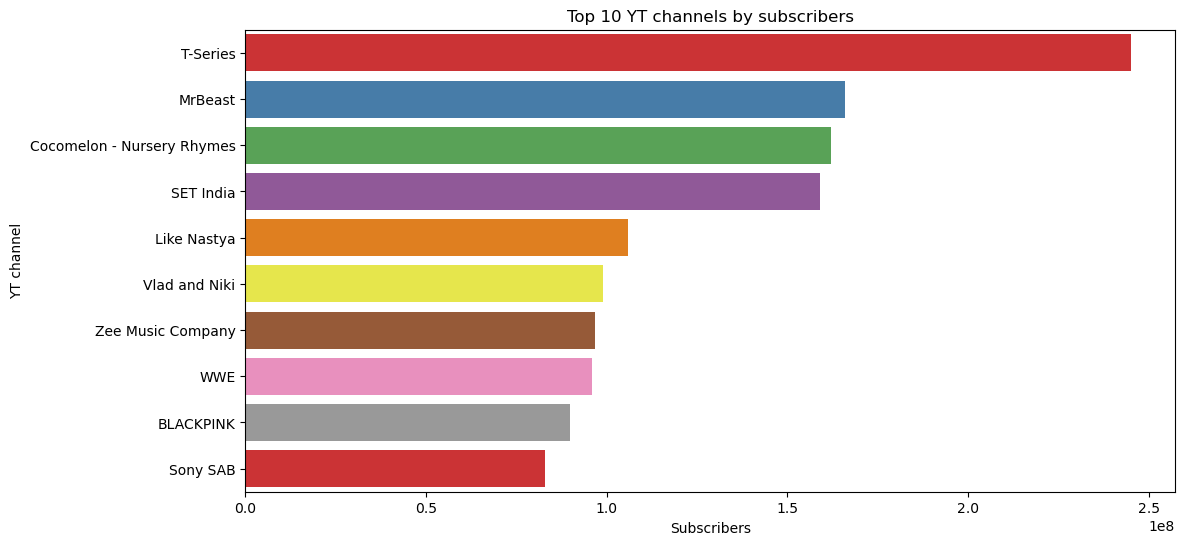

In [12]:
top_10_subscribers = df_cleaned.nlargest(10,'subscribers')

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_subscribers,
           x = 'subscribers',
           y= 'Youtuber',
           palette='Set1')

plt.title('Top 10 YT channels by subscribers')
plt.xlabel('Subscribers')
plt.ylabel('YT channel')
plt.show()

In [14]:
df_cleaned.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [19]:
fig = px.scatter(df_cleaned,
                x = 'subscribers',
                y = 'video views',
                size= 'video_views_for_the_last_30_days',
                color = 'category',
                hover_name='Youtuber', hover_data=['Country'], size_max=40,
                color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title_text = 'Subscribers vs Video Views by Category',xaxis_type= 'log',yaxis_type = 'log')

fig.show()

In [21]:
fig2 = px.sunburst(df_cleaned,path=['channel_type'], color_discrete_sequence=px.colors.qualitative.Set3)
fig2.update_layout(title_text = 'Distribution of YT channel types', height = 500)
fig2.show()

In [22]:
earning_columns = ['lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings',]

In [23]:
earning_df = df_cleaned[earning_columns]

In [24]:
fig4 = px.box(earning_df, title='Distribution of Earnings (in USD)')
fig4.show()

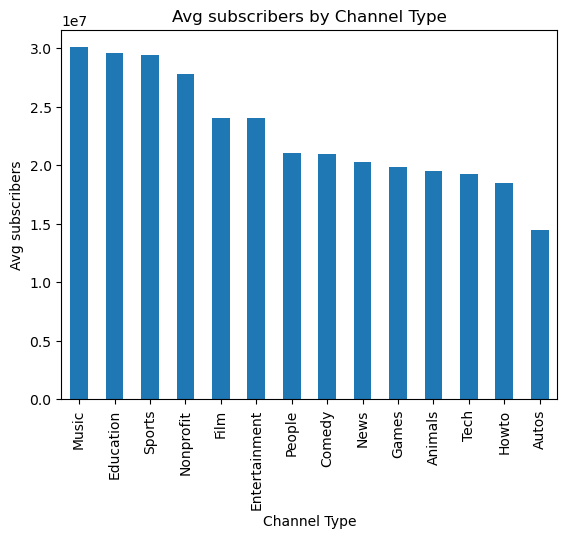

In [31]:
#avg subscriber by channel type

df_cleaned.groupby('channel_type')['subscribers'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Avg subscribers by Channel Type')
plt.ylabel('Avg subscribers')
plt.xlabel('Channel Type')
plt.show()

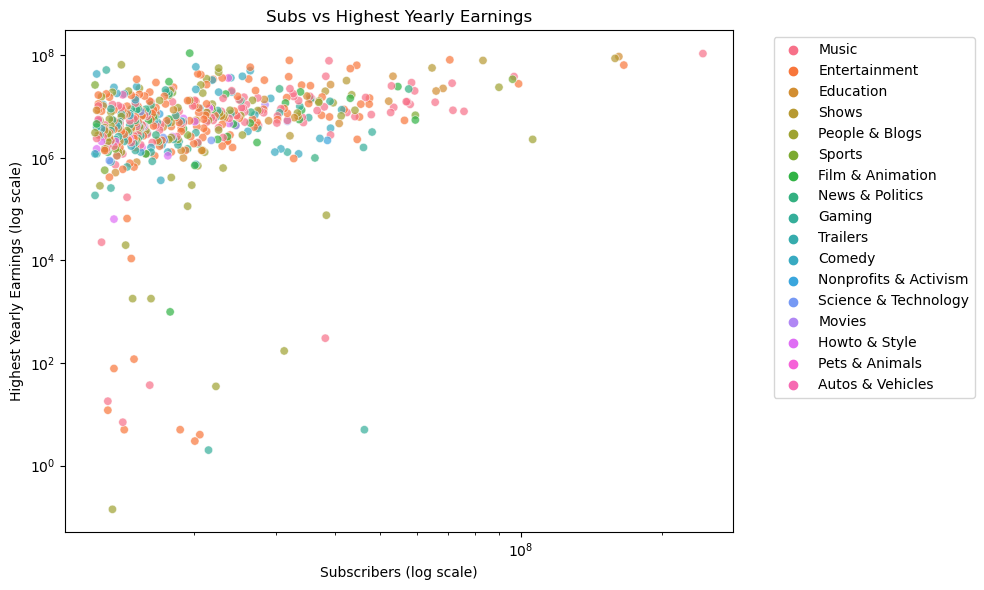

In [35]:
#Subs vs Highest yearly Earnings

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned,
               x='subscribers',
               y = 'highest_yearly_earnings',
               hue='category',
               alpha = 0.7)

plt.xscale('log')
plt.yscale('log')
plt.title('Subs vs Highest Yearly Earnings')
plt.xlabel('Subscribers (log scale)')
plt.ylabel('Highest Yearly Earnings (log scale)')
plt.legend(bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

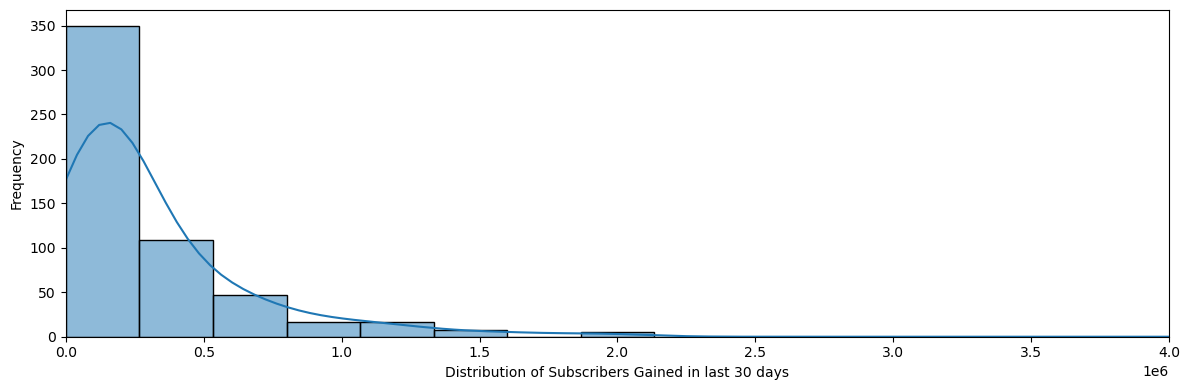

In [41]:
plt.figure(figsize = (12,4))
sns.histplot(df_cleaned['subscribers_for_last_30_days'], bins=30, kde=True)
plt.xlim(0,4000000)
plt.xlabel('Distribution of Subscribers Gained in last 30 days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()